<a href="https://colab.research.google.com/github/yamsunar089/YAMcn6005_portfolio/blob/main/Week_9(a).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Reflection on Apriori and Frequent Itemsets


When I worked on this question about finding all frequent itemsets using the Apriori algorithm, I finally understood how theory turns into a real step-by-step process. At first, the transactions just looked like a list of random items, but when I started counting 1-itemsets and calculating their support, I realised that Apriori is really about carefully filtering what is frequent enough to be interesting.

Using min_sup = 60% forced me to think in terms of both counts and percentages. I had to remember there are 5 transactions, so every support calculation was based on division by 5. That helped me connect the formula

support
(
𝑋
)
=
freq(𝑋)𝑁
support(X)=
N
freq(X)
	​


to actual numbers instead of just memorising it. I also had to pay attention to details like repeated items in the same transaction (e.g., “Onion, Onion” in T5 still counts as one Onion in that basket).                         Generating candidate 2-itemsets and 3-itemsets using only the frequent itemsets from the previous step gave me a practical understanding of the Apriori principle: if a bigger set is frequent, all of its subsets must also be frequent. This logic helped me see why we don’t need to check every possible combination — we only keep extending the ones that already pass the minimum support. Doing this manually made me more careful and systematic, instead of just relying on software.

Overall, solving this question made Apriori feel less abstract. I learned how to move from raw transaction data to frequent 1-itemsets, then to 2-itemsets and 3-itemsets, all under the given min_sup. It improved my confidence in working with support values and itemset generation, and it prepared me better for the next part of the topic: generating association rules using these frequent itemsets.

In [ ]:
import numpy as np
import pandas as pd
from mlxtend.frequent_patterns import apriori, association_rules

Loading and exploring the data

In [ ]:
import pandas as pd
df = pd.read_csv("/content/Groceries_dataset.csv")
print(df.head())

   Member_number        Date   itemDescription
0           1808  21-07-2015    tropical fruit
1           2552  05-01-2015        whole milk
2           2300  19-09-2015         pip fruit
3           1187  12-12-2015  other vegetables
4           3037  01-02-2015        whole milk


Group items by transaction

In [ ]:
basket = df.groupby(['Member_number', 'Date'])['itemDescription'].apply(list).reset_index()
transactions = basket['itemDescription'].tolist()
print(transactions)

[['sausage', 'whole milk', 'semi-finished bread', 'yogurt'], ['whole milk', 'pastry', 'salty snack'], ['canned beer', 'misc. beverages'], ['sausage', 'hygiene articles'], ['soda', 'pickled vegetables'], ['frankfurter', 'curd'], ['sausage', 'whole milk', 'rolls/buns'], ['whole milk', 'soda'], ['beef', 'white bread'], ['frankfurter', 'soda', 'whipped/sour cream'], ['frozen vegetables', 'other vegetables'], ['butter', 'whole milk'], ['tropical fruit', 'sugar'], ['butter milk', 'specialty chocolate'], ['sausage', 'rolls/buns'], ['root vegetables', 'detergent'], ['frozen meals', 'dental care'], ['rolls/buns', 'rolls/buns'], ['dish cleaner', 'cling film/bags'], ['canned beer', 'frozen fish'], ['other vegetables', 'hygiene articles'], ['pip fruit', 'whole milk', 'tropical fruit'], ['rolls/buns', 'red/blush wine', 'chocolate'], ['other vegetables', 'shopping bags'], ['whole milk', 'chocolate', 'packaged fruit/vegetables', 'rolls/buns'], ['root vegetables', 'whole milk', 'pastry'], ['rolls/buns

convert to one hot format

In [ ]:
from mlxtend.preprocessing import TransactionEncoder
te = TransactionEncoder()
te_array = te.fit(transactions).transform(transactions)
df_encoded = pd.DataFrame(te_array, columns=te.columns_)

run apriory algorithm

In [ ]:
from mlxtend.frequent_patterns import apriori
frequent_itemsets = apriori(df_encoded, min_support=0.01, use_colnames=True)
print("Total Frequent Itemsets:", frequent_itemsets.shape[0])

Total Frequent Itemsets: 69


/usr/local/lib/python3.12/dist-packages/jupyter_client/session.py:203: DeprecationWarning: datetime.datetime.utcnow() is deprecated and scheduled for removal in a future version. Use timezone-aware objects to represent datetimes in UTC: datetime.datetime.now(datetime.UTC).
  return datetime.utcnow().replace(tzinfo=utc)
/usr/local/lib/python3.12/dist-packages/jupyter_client/session.py:203: DeprecationWarning: datetime.datetime.utcnow() is deprecated and scheduled for removal in a future version. Use timezone-aware objects to represent datetimes in UTC: datetime.datetime.now(datetime.UTC).
  return datetime.utcnow().replace(tzinfo=utc)
/usr/local/lib/python3.12/dist-packages/jupyter_client/session.py:203: DeprecationWarning: datetime.datetime.utcnow() is deprecated and scheduled for removal in a future version. Use timezone-aware objects to represent datetimes in UTC: datetime.datetime.now(datetime.UTC).
  return datetime.utcnow().replace(tzinfo=utc)


Generate association rules

In [ ]:
from mlxtend.frequent_patterns import association_rules
rules = association_rules(frequent_itemsets, metric="confidence", min_threshold=0.1)
rules = rules[rules['antecedents'].apply(lambda x: len(x) >= 1) & rules['consequents'].apply(lambda x: len(x) >= 1)]
print("Association Rules:", rules.shape[0])
rules[['antecedents', 'consequents', 'support', 'confidence', 'lift']].head(5)

/usr/local/lib/python3.12/dist-packages/jupyter_client/session.py:203: DeprecationWarning: datetime.datetime.utcnow() is deprecated and scheduled for removal in a future version. Use timezone-aware objects to represent datetimes in UTC: datetime.datetime.now(datetime.UTC).
  return datetime.utcnow().replace(tzinfo=utc)
/usr/local/lib/python3.12/dist-packages/jupyter_client/session.py:203: DeprecationWarning: datetime.datetime.utcnow() is deprecated and scheduled for removal in a future version. Use timezone-aware objects to represent datetimes in UTC: datetime.datetime.now(datetime.UTC).
  return datetime.utcnow().replace(tzinfo=utc)
/usr/local/lib/python3.12/dist-packages/jupyter_client/session.py:203: DeprecationWarning: datetime.datetime.utcnow() is deprecated and scheduled for removal in a future version. Use timezone-aware objects to represent datetimes in UTC: datetime.datetime.now(datetime.UTC).
  return datetime.utcnow().replace(tzinfo=utc)
/usr/local/lib/python3.12/dist-packag

Association Rules: 4


/usr/local/lib/python3.12/dist-packages/jupyter_client/session.py:203: DeprecationWarning: datetime.datetime.utcnow() is deprecated and scheduled for removal in a future version. Use timezone-aware objects to represent datetimes in UTC: datetime.datetime.now(datetime.UTC).
  return datetime.utcnow().replace(tzinfo=utc)
/usr/local/lib/python3.12/dist-packages/jupyter_client/session.py:203: DeprecationWarning: datetime.datetime.utcnow() is deprecated and scheduled for removal in a future version. Use timezone-aware objects to represent datetimes in UTC: datetime.datetime.now(datetime.UTC).
  return datetime.utcnow().replace(tzinfo=utc)


,antecedents,consequents,support,confidence,lift
0,(other vegetables),(whole milk),0.014837,0.121511,0.769430
1,(rolls/buns),(whole milk),0.013968,0.126974,0.804028
2,(soda),(whole milk),0.011629,0.119752,0.758296
3,(yogurt),(whole milk),0.011161,0.129961,0.822940


/usr/local/lib/python3.12/dist-packages/jupyter_client/session.py:203: DeprecationWarning: datetime.datetime.utcnow() is deprecated and scheduled for removal in a future version. Use timezone-aware objects to represent datetimes in UTC: datetime.datetime.now(datetime.UTC).
  return datetime.utcnow().replace(tzinfo=utc)
/usr/local/lib/python3.12/dist-packages/jupyter_client/session.py:203: DeprecationWarning: datetime.datetime.utcnow() is deprecated and scheduled for removal in a future version. Use timezone-aware objects to represent datetimes in UTC: datetime.datetime.now(datetime.UTC).
  return datetime.utcnow().replace(tzinfo=utc)
/usr/local/lib/python3.12/dist-packages/jupyter_client/session.py:203: DeprecationWarning: datetime.datetime.utcnow() is deprecated and scheduled for removal in a future version. Use timezone-aware objects to represent datetimes in UTC: datetime.datetime.now(datetime.UTC).
  return datetime.utcnow().replace(tzinfo=utc)
/usr/local/lib/python3.12/dist-packag

Visualize the most popuular items

/usr/local/lib/python3.12/dist-packages/jupyter_client/session.py:203: DeprecationWarning: datetime.datetime.utcnow() is deprecated and scheduled for removal in a future version. Use timezone-aware objects to represent datetimes in UTC: datetime.datetime.now(datetime.UTC).
  return datetime.utcnow().replace(tzinfo=utc)
/usr/local/lib/python3.12/dist-packages/jupyter_client/session.py:203: DeprecationWarning: datetime.datetime.utcnow() is deprecated and scheduled for removal in a future version. Use timezone-aware objects to represent datetimes in UTC: datetime.datetime.now(datetime.UTC).
  return datetime.utcnow().replace(tzinfo=utc)
/usr/local/lib/python3.12/dist-packages/jupyter_client/session.py:203: DeprecationWarning: datetime.datetime.utcnow() is deprecated and scheduled for removal in a future version. Use timezone-aware objects to represent datetimes in UTC: datetime.datetime.now(datetime.UTC).
  return datetime.utcnow().replace(tzinfo=utc)
/usr/local/lib/python3.12/dist-packag

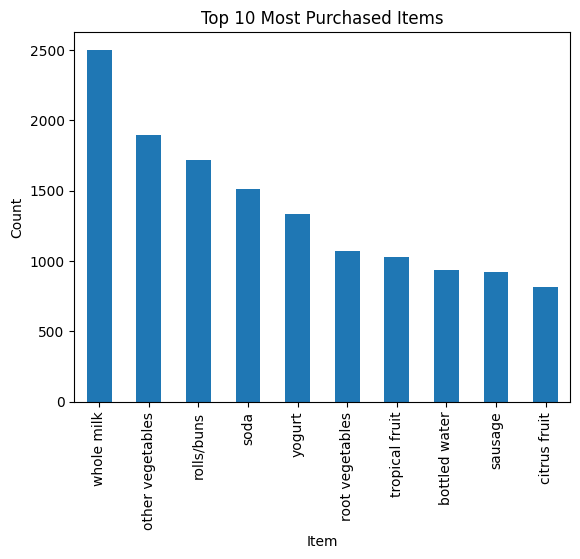

/usr/local/lib/python3.12/dist-packages/jupyter_client/session.py:203: DeprecationWarning: datetime.datetime.utcnow() is deprecated and scheduled for removal in a future version. Use timezone-aware objects to represent datetimes in UTC: datetime.datetime.now(datetime.UTC).
  return datetime.utcnow().replace(tzinfo=utc)
/usr/local/lib/python3.12/dist-packages/jupyter_client/session.py:203: DeprecationWarning: datetime.datetime.utcnow() is deprecated and scheduled for removal in a future version. Use timezone-aware objects to represent datetimes in UTC: datetime.datetime.now(datetime.UTC).
  return datetime.utcnow().replace(tzinfo=utc)
/usr/local/lib/python3.12/dist-packages/jupyter_client/session.py:203: DeprecationWarning: datetime.datetime.utcnow() is deprecated and scheduled for removal in a future version. Use timezone-aware objects to represent datetimes in UTC: datetime.datetime.now(datetime.UTC).
  return datetime.utcnow().replace(tzinfo=utc)
/usr/local/lib/python3.12/dist-packag

In [ ]:
import matplotlib.pyplot as plt
top_items = df['itemDescription'].value_counts().head(10)
top_items.plot(kind='bar', title='Top 10 Most Purchased Items')
plt.xlabel("Item")
plt.ylabel("Count")
plt.show()

In [ ]:
a